## <font color='green'> **Stock Prediction using LSTM** </font>

### **What to Predict in This Stock Dataset?**  
For **Apple (AAPL) stock data**, you can predict different aspects depending on your goal. Here are the key predictions you can make:

---

### **1️⃣ Predict Future Stock Prices (Regression)**
- **Target:** `Close` price (most common)  
- **Model:** LSTM, GRU, ARIMA, or XGBoost  
- **Use Case:** Helps in **investment decisions**, price trend forecasting  

📌 **Example:**  
Train an LSTM model to predict the closing price based on historical data.  
```python
y_train.append(data_training_array[i, 0])  # Close price as the target
```

---

### **2️⃣ Predict Stock Price Direction (Classification)**
- **Target:** `Up (1)` or `Down (0)` for the **next day’s close price**  
- **Model:** Logistic Regression, Random Forest, Deep Learning  
- **Use Case:** Helps in **trading decisions** (Buy/Sell signals)  

📌 **Example:**  
If tomorrow’s **Close > Today’s Close**, label it as `1`, otherwise `0`.

---

### **3️⃣ Predict Stock Volatility (Risk Analysis)**
- **Target:** Predict whether stock volatility will be high or low  
- **Model:** GARCH, LSTMs, Statistical Models  
- **Use Case:** Helps in **risk management** and option pricing  

📌 **Example:**  
Use past **High-Low price differences** and **Volume** to detect volatility spikes.

---

### **4️⃣ Predict Trading Volume (Market Activity)**
- **Target:** `Volume` of shares traded  
- **Model:** Time Series Regression  
- **Use Case:** Helps **institutional traders** predict market movements  

📌 **Example:**  
Predict **if tomorrow’s trading volume will increase** based on past trends.

---

### **Which One Should You Choose?**
✅ **Best for Beginners:** **Predicting Close Price (Regression)**  
✅ **Best for Traders:** **Predicting Stock Direction (Classification)**  
✅ **Best for Risk Management:** **Predicting Volatility**  



In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

### <font color='FF007F'> **1. Data Collection** </font>

In [ ]:
# !pip install pandas_datareader
# !pip install --upgrade yfinance pandas_datareader


#### **About Dataset**
This dataset is a historical stock price dataset for Apple Inc. (AAPL).

**Columns Explanation** </p>
**Date**: The trading date.</p>
**Close**: The adjusted closing price of AAPL stock.</p>
**High**: The highest price of AAPL stock on that day.</p>
**Low**: The lowest price of AAPL stock on that day.</p>
**Open**: The opening price of AAPL stock on that day.</p>
**Volume**: The number of shares traded on that day.</p>

In [ ]:
now = datetime.now()
# print(now)

start = datetime (now.year-10, now.month, now.day)
end = now
ticker='AAPL'  # Apple ticker 

df = yf.download(ticker, start, end)
df



In [ ]:
df.head()

In [ ]:
df.tail()

### <font color='FF007F'> **2. Data Exploration & Visualization** </font>

In [ ]:
type(df)

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.info()

#### **Check Null values**

In [ ]:
df.isnull().sum()

#### **Statistical Summary of Data**

In [ ]:
df.describe()

#### **Check Data Types**

In [ ]:
df.dtypes

In [ ]:
df = df.reset_index()
df.head()

In [ ]:
df.columns = ['Date','Close','High','Low','Open','Volume']
df.head()

In [ ]:
from tkinter import Label
# plt.switch_backend('AGG') # Anti-
plt.figure(figsize=(12,5))
plt.plot(df.Close, Label='CLOSING PRICE')
plt.title(f'closing price of {ticker}')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()

### <font color='FF007F'> **3. Feature Engineering** </font>

**Moving Average**
<p> A moving average in statistics is a technique used to smooth out fluctuations in a data set by calculating the average of a subset of data points over a specified window.  </p>

<p> It is commonly used in time series analysis to identify trends and patterns. </p>

In [ ]:
# temp_df = range(10,110,10)
# print(list(temp_df))
# print("Moving average:", sum(temp_df[:5])/5) # manual method
# # print("Moving average:", (10+20+30+40+50) / 5)

# avg_df = pd.DataFrame(temp_df)
# avg_df

# avg_df ['MV_5'] = avg_df.rolling(5).mean()
# avg_df

#### **100 days Moving Average**

In [ ]:
df['MA_100'] = df.Close.rolling(100).mean()
df.to_csv("100_days_moving_avg.csv",index=True)
df

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')

#### **200 days Moving Average**

In [ ]:
df['MA_200'] = df.Close.rolling(200).mean()
df

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'],'r')
plt.plot(df['MA_200'],'g')
plt.title('100 Days & 200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Close Price')

Calculating % changed in each trading session

The .pct_change() function in pandas calculates the percentage change between consecutive values in a column.
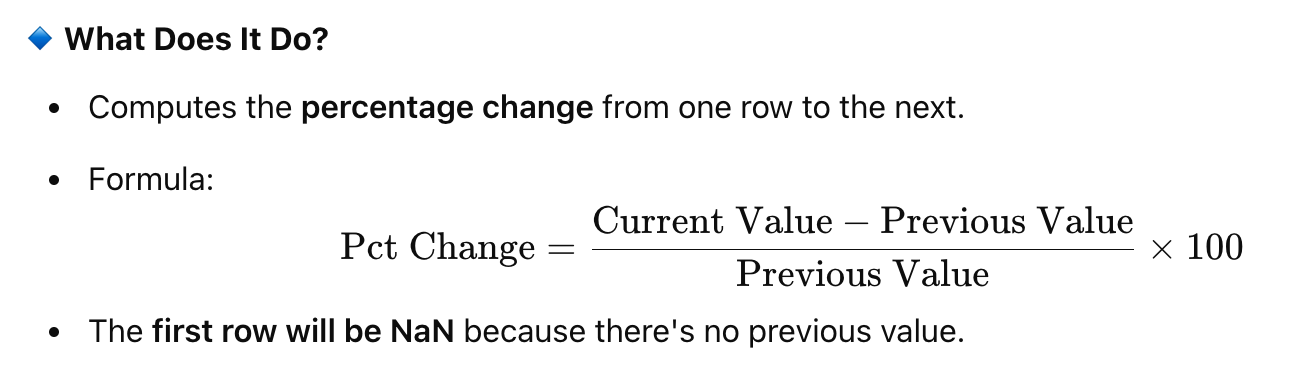

In [ ]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']] 

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

### <font color='FF007F'> **4. Data Preprocessing** </font>

In [ ]:
df.shape

<p> Splitting data into training and testing datasets

In [ ]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
print(data_training)

data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_testing)

<p> Scaling down the Data between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

### <font color='FF007F'> **5. Sequence Creation** </font>

In [ ]:
data_training_array.shape[0]

In [ ]:
for i in range(100,data_training_array.shape[0]):
    print(i)

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)
# x_train
# y_train

# x_train.shape
# y_train.shape

# x_train.ndim
# y_train.ndim

This code snippet is preparing training data (`x_train` and `y_train`) for a time series forecasting model, likely for an LSTM (Long Short-Term Memory) neural network.

### **Explanation:**
- `data_training_array` is assumed to be a NumPy array containing time series data.
- The goal is to create input (`x_train`) and output (`y_train`) pairs for training the model.
- A **sliding window approach** is used, where each `x_train` entry consists of **100 past observations**, and the corresponding `y_train` entry is the **next value to predict**.

### **Breakdown of the loop:**
```python
x_train = []
y_train = []
```
- Initialize empty lists for storing input (`x_train`) and output (`y_train`).

```python
for i in range(100, data_training_array.shape[0]):
```
- Start looping from `i = 100` up to the last index of `data_training_array`.
- This ensures we have at least **100 past observations** before making a prediction.

```python
    x_train.append(data_training_array[i-100: i])
```
- **Extract the past 100 values** (from index `i-100` to `i-1`) and **append them to `x_train`**.
- This means `x_train[i-100]` contains the last **100** values before time step `i`.

```python
    y_train.append(data_training_array[i, 0])
```
- **Store the next actual value (`data_training_array[i, 0]`) in `y_train`**.
- This is the target output corresponding to the past 100 values.

---

### **Example**
Assume `data_training_array` has the following values (simplified version):

| Index | Value |
|--------|-------|
| 0      | 10    |
| 1      | 12    |
| 2      | 14    |
| ...    | ...   |
| 100    | 110   |
| 101    | 115   |
| 102    | 120   |

For `i = 100`:
- `x_train[0]` = `[10, 12, 14, ..., 110]` (past 100 values)
- `y_train[0]` = `115` (next value to predict)

For `i = 101`:
- `x_train[1]` = `[12, 14, 16, ..., 115]`
- `y_train[1]` = `120`

This process continues until the end of `data_training_array`.

### **Why is this used?**
This method helps train a **sequence-based model**, like an LSTM, where:
- The model learns from **past 100 time steps** (`x_train`).
- It predicts the **next time step** (`y_train`).
- The sliding window approach ensures **continuous learning** from the dataset.

Let me know if you need further clarification! 🚀

In [ ]:
# x_train

In [ ]:
# x_train.shape

In [ ]:
# y_train

In [ ]:
# y_train.shape

### <font color='FF007F'> **6. Model Building** </font>

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
#ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [ ]:
model = Sequential()
model.add(Input(shape=(100,1))) # Past 100 time steps (days/hours) as input. & Single feature (e.g., closing price).
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))  # Dense layer with 25 neurons.
model.add(Dense(1)) # Final output layer with 1 neuron. Outputs a single predicted value (e.g., next day's stock price).

1. Sequential() → Initializes a sequential neural network.
2. LSTM() → Long Short-Term Memory layers to process time-series data.
3. Dense() → Fully connected layers for output.

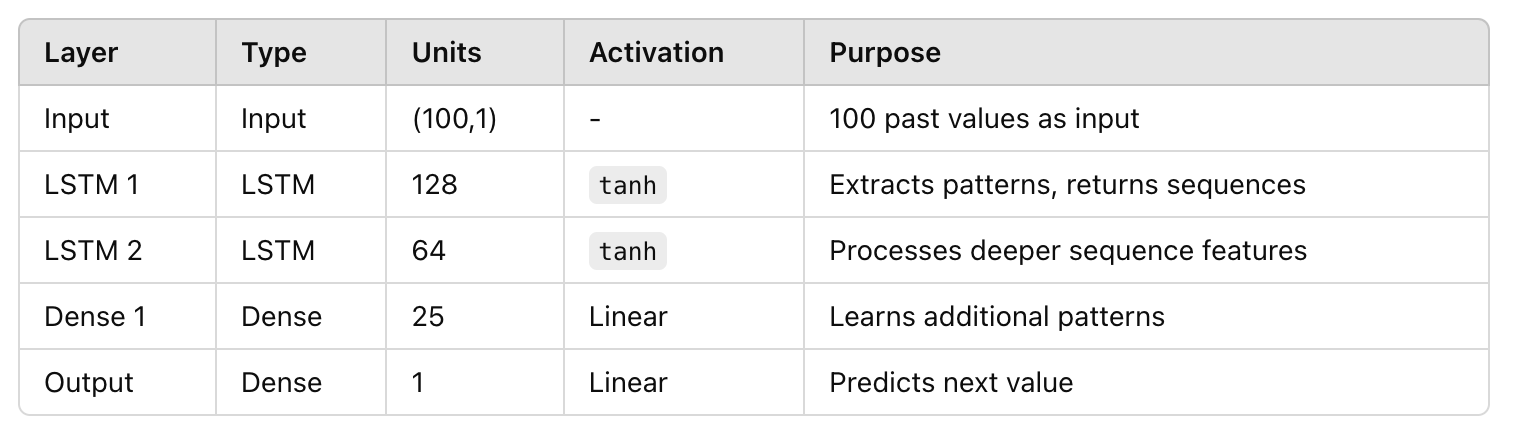

### <font color='FF007F'> **7. Model Training** </font>

In [ ]:
from scipy import optimize
model.compile(optimizer = 'adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


In [ ]:
model.summary()

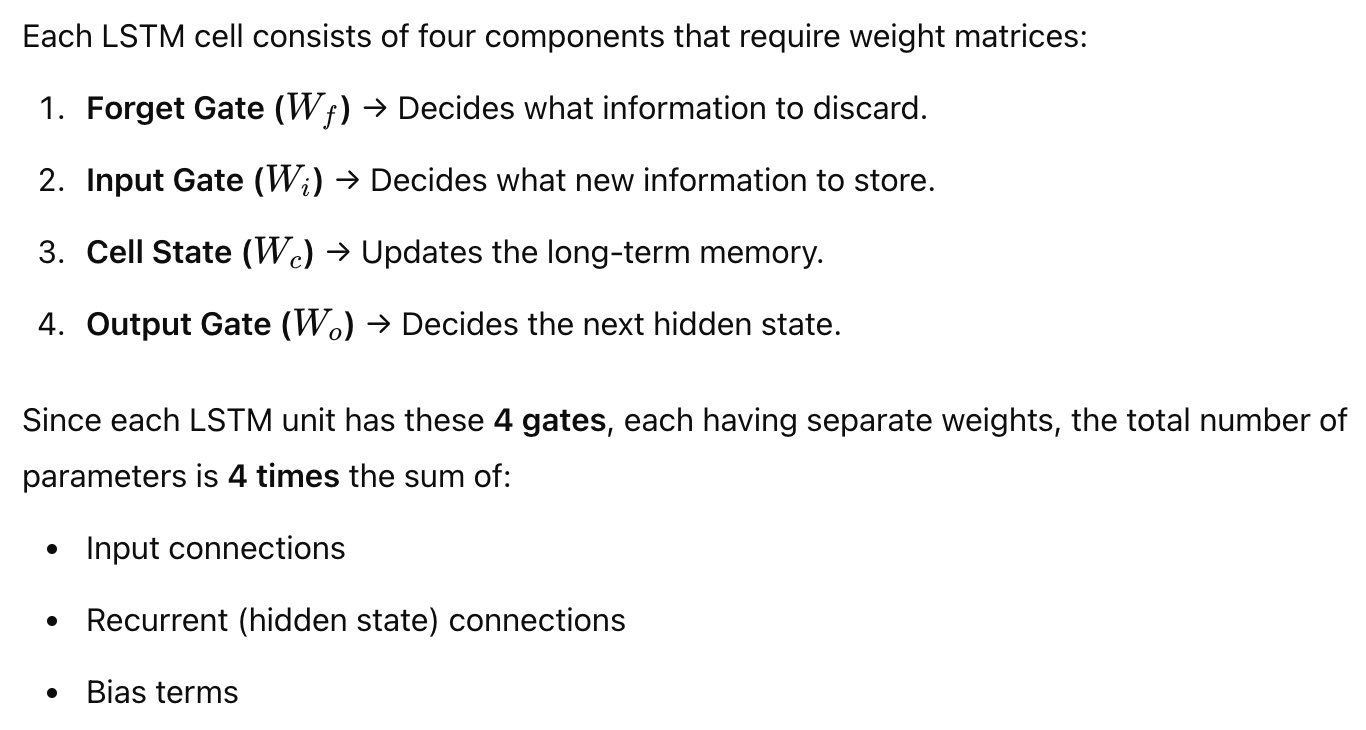

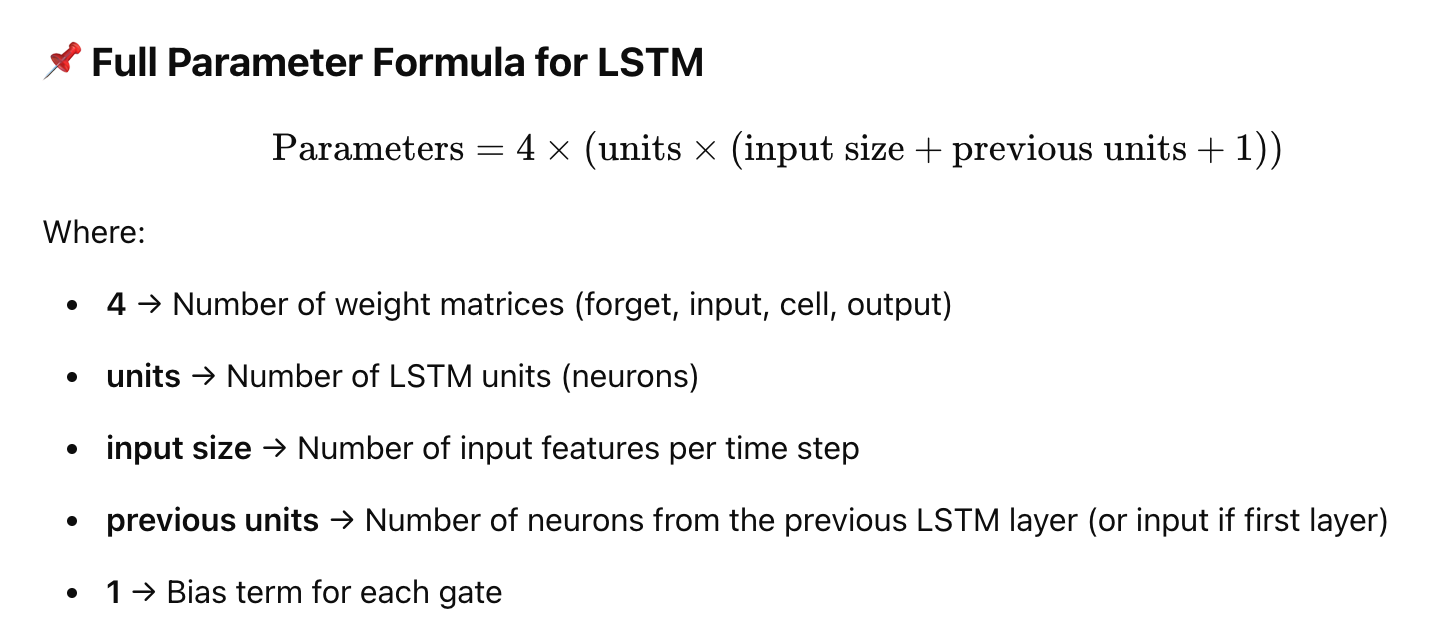

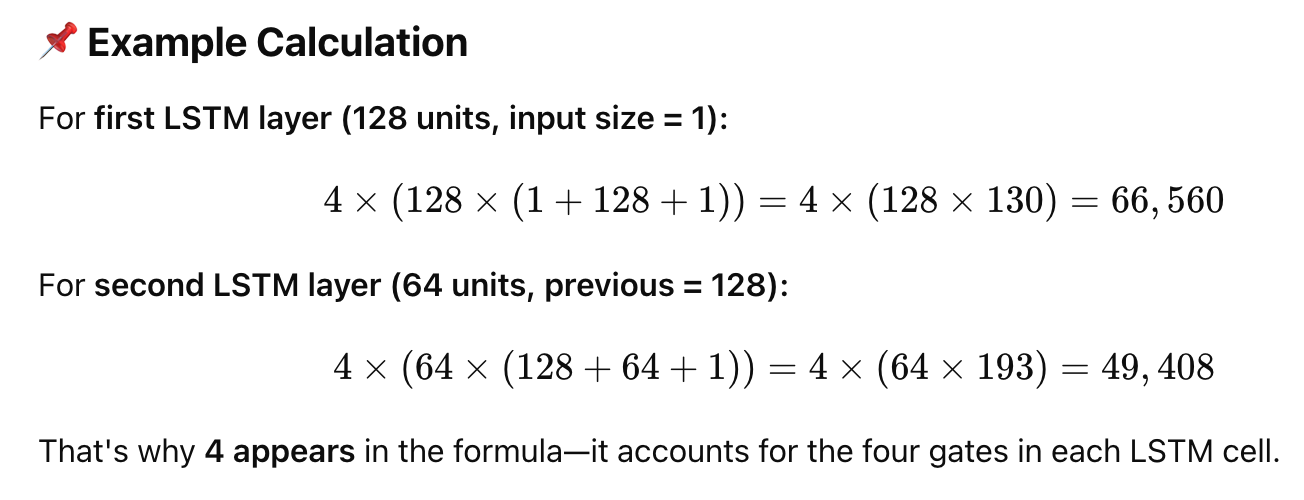

In [ ]:
# Save the trained model
model.save('stock_prediction_model.keras')

### <font color='FF007F'> **8. Preparing Test Data** </font>

In [ ]:
data_testing

In [ ]:
past_100_days = data_training.tail(100)
past_100_days

In [ ]:
final_df  = pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)


In [ ]:
x_test

In [ ]:
y_test

### <font color='FF007F'> **9. Making Predictions** </font>

In [ ]:
y_predicted = model.predict(x_test)

In [ ]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [ ]:
y_predicted

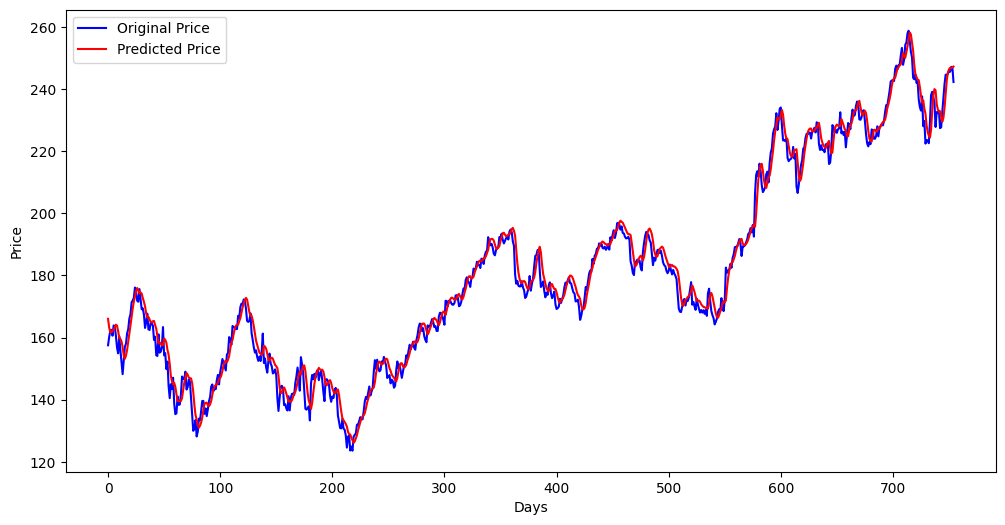

In [139]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

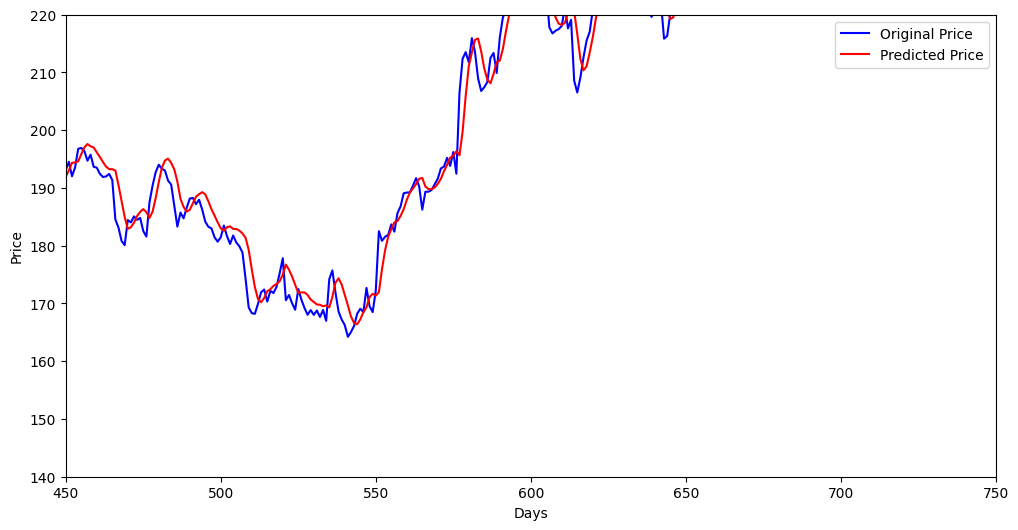

In [138]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(140,220)
plt.show()

### <font color='FF007F'> **10. Model Evaluation** </font>

In [152]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error,r2_score

In [149]:
msc = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {msc}' )


Mean Squared Error (MSE): 14.330896547270804


In [150]:
# Root Mean Squared Error(RMSE)
rmse = np.sqrt(msc)
print(f'Root Mean Squared Error (RMSE) {rmse}')

Root Mean Squared Error (RMSE) 3.7856170629463834


In [154]:
# r-Squard 
r2 = r2_score(y_test, y_predicted)
print(f'r-squard: {r2}')

r-squard: 0.9861238040285483
